In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (6998, 11757)
Valores únicos:  [1]


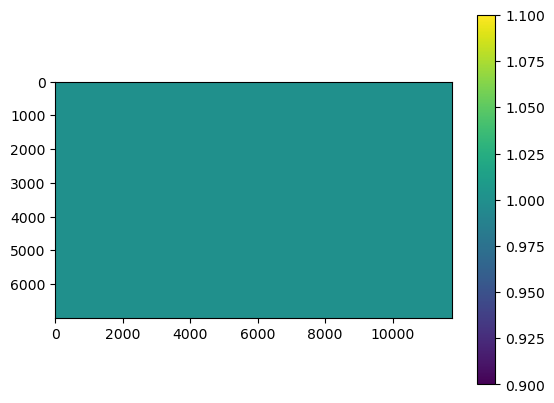

In [2]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif')
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))

Valores originales únicos: [1]


Forma: (6998, 11757)
Valores únicos: [0 1]
Valor NoData: 0.0


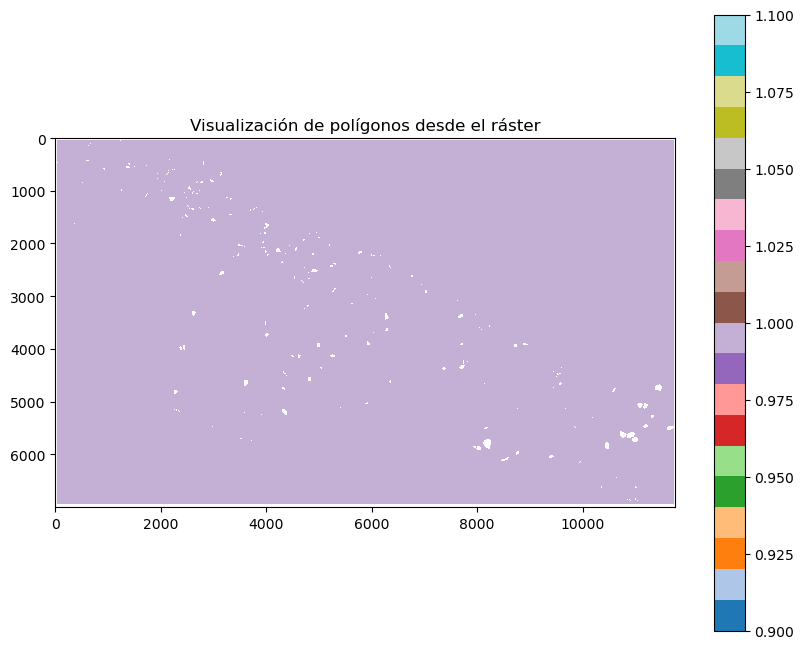

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif'

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()

Valor NoData: 0.0


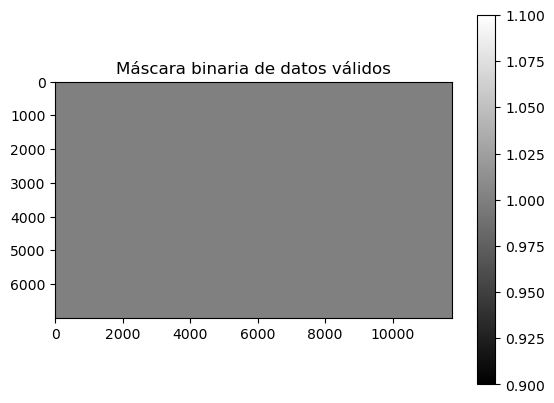

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()

Forma:  (7969, 13231)
Valores únicos:  [1.]


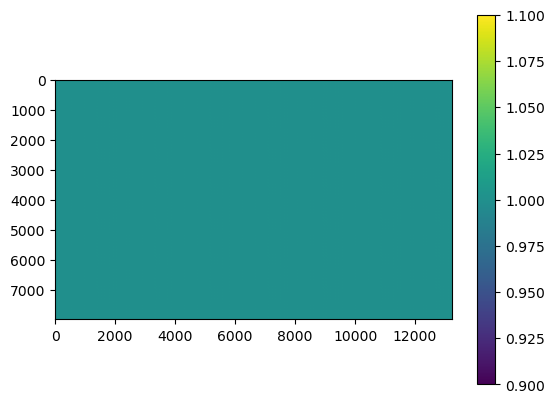

In [6]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

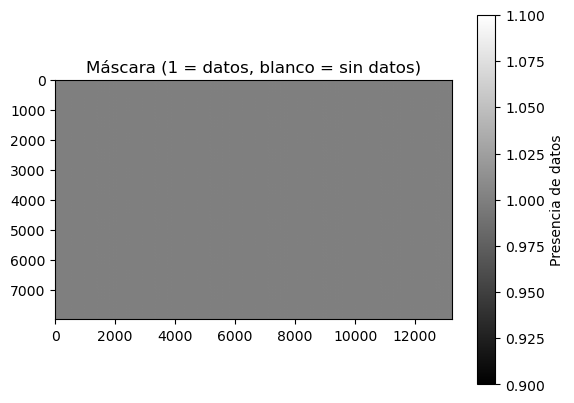

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()

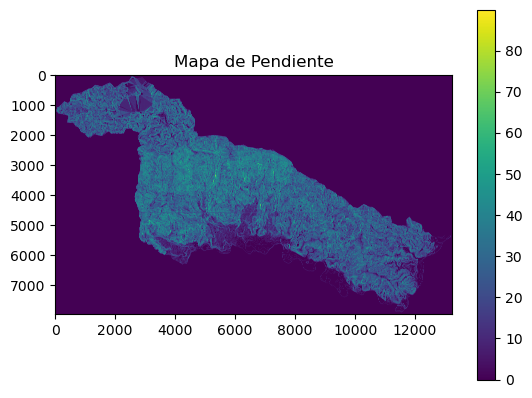

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()


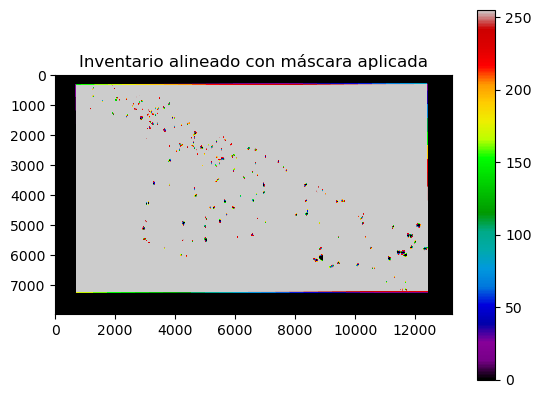

In [9]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif') as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()

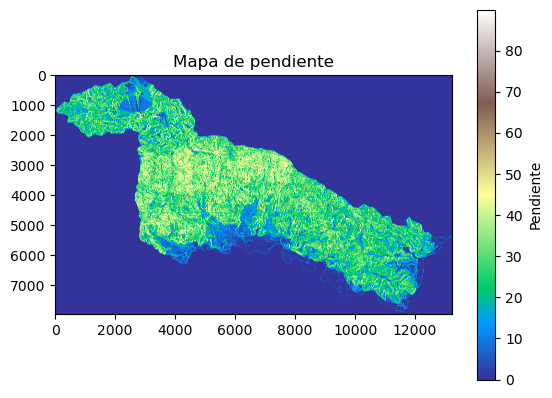

In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [0.0000000e+00 1.2363964e-03 2.4727928e-03 ... 8.9925980e+01 8.9925987e+01
 8.9926003e+01]


numpy.ndarray

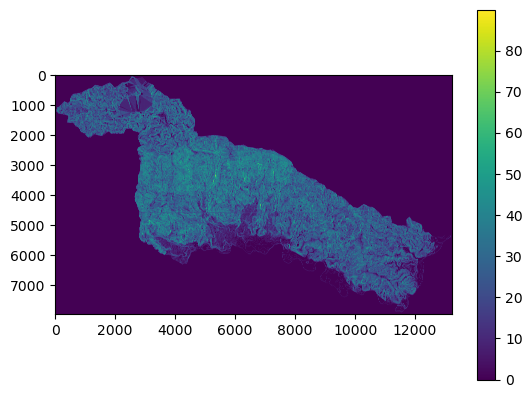

In [11]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
slope=raster.read(1)
slope=np.where(slope<0,np.nan,slope)
plt.imshow(slope)
plt.colorbar();

print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))
type(slope)

Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.13173148e-04 1.21383986e-04 ... 3.59999664e+02
 3.59999878e+02            nan]


numpy.ndarray

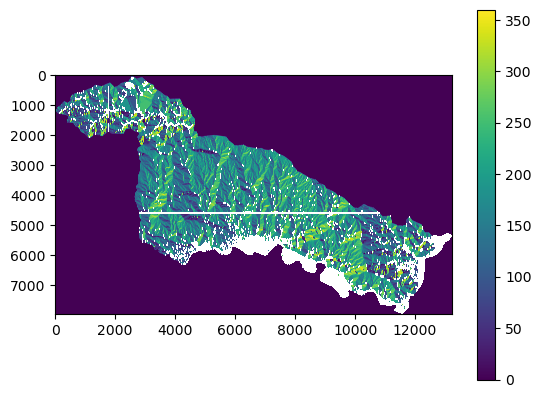

In [12]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Aspecto\Aspect.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

(105437839,)

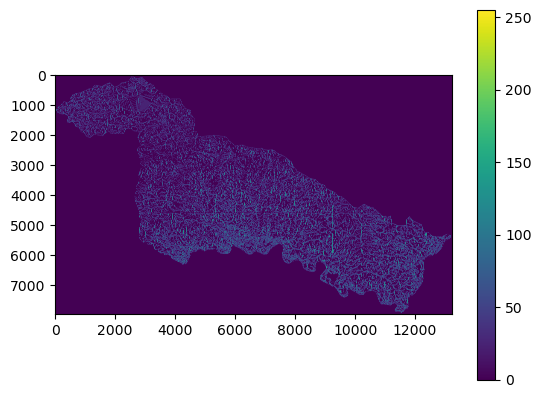

In [13]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\flujo\flujo_ac_lad.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

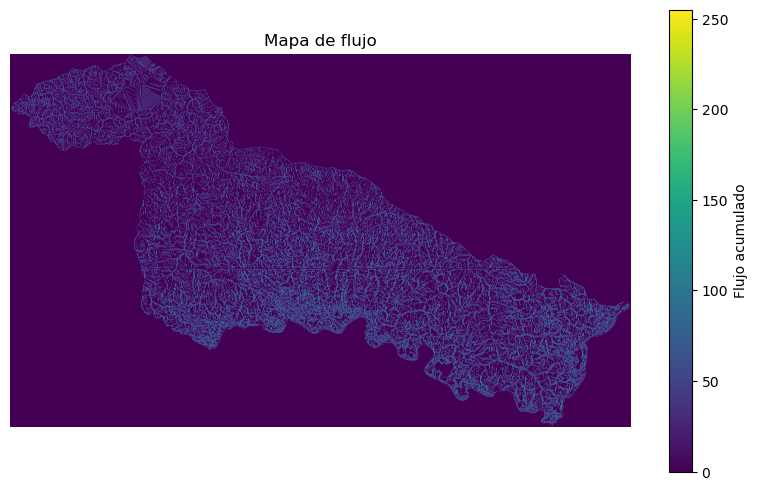

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(flujo, cmap='viridis')  # Puedes probar otros colormaps también
plt.colorbar(label='Flujo acumulado')
plt.title('Mapa de flujo')
plt.axis('off')
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 18

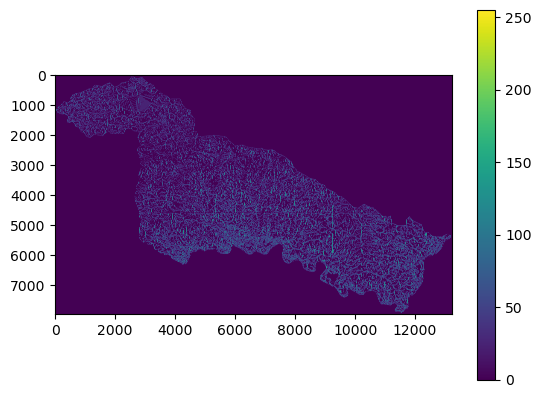

In [15]:
flujo1 = msk*flujo
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

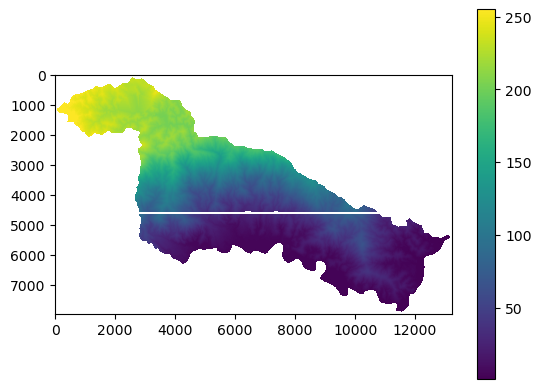

In [16]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\eleva\elevation.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

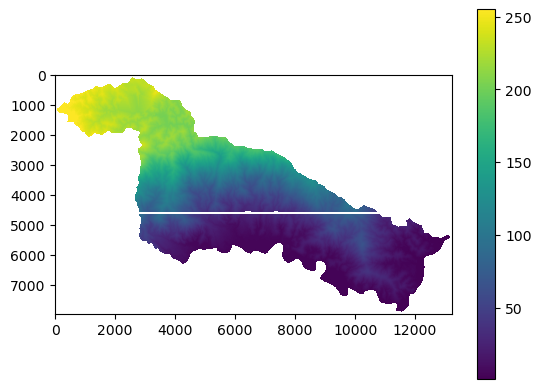

In [17]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

In [18]:
inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])





flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])







Longitud inventariovector:  105437839
Longitud slopevector:  105437839
Longitud aspectovector:  105437839
Longitud flujovector:  105437839
Longitud elevacionvector:  105437839


In [19]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores están definidos
inventariovector = inventario1.ravel()
slopevector = slope.ravel()
aspectovector = aspecto.ravel()


flujovector = flujo1.ravel()
elevacionvector = elevacion1.ravel()



# Paso 2: Apilamos todos los vectores en un array 2D (ahora con cobertura1vector)
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    
    flujovector,
    elevacionvector,
      # <-- agregado
], axis=1)

# Paso 3: Creamos una máscara que elimina filas con al menos un NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicamos la máscara a todos los datos a la vez
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores con sufijo MenM
inventariovectorMenM   = stack_clean[:, 0]
slopevectorMenM        = stack_clean[:, 1]
aspectovectorMenM      = stack_clean[:, 2]


flujovectorMenM        = stack_clean[:, 3]
elevacionvectorMenM    = stack_clean[:, 4]


print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])


Longitud final (sin NaN en ninguna capa): 36486974


In [20]:
# Realizamos el DataFrame con las variables nuevas y sin curvatura, incluyendo Cobertura

diccionario = {
    'Inventario': inventariovectorMenM,
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
 
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM,
  
}

df = pd.DataFrame(diccionario)
print(list(df.columns))

# df.tail(5)


['Inventario', 'Pendiente', 'Aspectos', 'Flujo', 'Elevación']


In [21]:
df.head()

,Inventario,Pendiente,Aspectos,Flujo,Elevación
0,0.0,0.0,0.0,0.0,239.0
1,0.0,0.0,0.0,0.0,239.0
2,0.0,0.0,0.0,0.0,239.0
3,0.0,0.0,0.0,103.0,239.0
4,0.0,0.0,0.0,169.0,239.0


In [22]:
#varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud', 'flujo']
varContinuas = ['Pendiente', 'Aspectos', 'Elevación', 'Flujo']



In [23]:
dfLR = df.copy()

# Estandarización de variables continuas
for var in varContinuas:
    dfLR[var] = (dfLR[var] - dfLR[var].mean()) / dfLR[var].std()

dfLR.head()


,Inventario,Pendiente,Aspectos,Flujo,Elevación
0,0.0,-2.305531,-2.158682,-0.416766,1.823443
1,0.0,-2.305531,-2.158682,-0.416766,1.823443
2,0.0,-2.305531,-2.158682,-0.416766,1.823443
3,0.0,-2.305531,-2.158682,1.295355,1.823443
4,0.0,-2.305531,-2.158682,2.392442,1.823443


In [24]:
print(dfLR['Inventario'].unique())


[  0. 255.]


In [25]:
dfLR['Inventario'] = dfLR['Inventario'].apply(lambda x: 1 if x == 255 else 0)


In [26]:
print(dfLR['Inventario'].unique())

[0 1]


In [27]:
X=dfLR.drop("Inventario", axis=1)
y=dfLR['Inventario']
X.head()

,Pendiente,Aspectos,Flujo,Elevación
0,-2.305531,-2.158682,-0.416766,1.823443
1,-2.305531,-2.158682,-0.416766,1.823443
2,-2.305531,-2.158682,-0.416766,1.823443
3,-2.305531,-2.158682,1.295355,1.823443
4,-2.305531,-2.158682,2.392442,1.823443


In [28]:
var_names2=['Pendiente','Aspectos','Flujo','Elevación']
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,Inventario,Pendiente,Aspectos,Flujo,Elevación
0,0.0,-2.305531,-2.158682,-0.416766,1.823443
1,0.0,-2.305531,-2.158682,-0.416766,1.823443
2,0.0,-2.305531,-2.158682,-0.416766,1.823443
3,0.0,-2.305531,-2.158682,1.295355,1.823443
4,0.0,-2.305531,-2.158682,2.392442,1.823443


In [29]:
X=df.drop("Inventario", axis=1)
y=df['Inventario']
X.head()


,Pendiente,Aspectos,Flujo,Elevación
0,-2.305531,-2.158682,-0.416766,1.823443
1,-2.305531,-2.158682,-0.416766,1.823443
2,-2.305531,-2.158682,-0.416766,1.823443
3,-2.305531,-2.158682,1.295355,1.823443
4,-2.305531,-2.158682,2.392442,1.823443


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA

LinearDiscriminantAnalysis(n_components=1)

In [31]:
model = LDA.fit(X,y)

In [32]:

f = {
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM
}
x_map = pd.DataFrame(f)

print(x_map.head())



   Pendiente  Aspectos  Flujo  Elevación
0        0.0       0.0    0.0      239.0
1        0.0       0.0    0.0      239.0
2        0.0       0.0    0.0      239.0
3        0.0       0.0  103.0      239.0
4        0.0       0.0  169.0      239.0


In [33]:
IS=model.predict(x_map)


x_map creado con datos MenM. Primeras 5 filas:
   Pendiente  Aspectos  Flujo  Elevación
0        0.0       0.0    0.0      239.0
1        0.0       0.0    0.0      239.0
2        0.0       0.0    0.0      239.0
3        0.0       0.0  103.0      239.0
4        0.0       0.0  169.0      239.0
Shape de x_map: (36486974, 4)

Longitud de IS (predicción): 36486974
Número de índices válidos encontrados por la máscara: 36486974
Shape del raster IS reconstruido: (7969, 13231)
Valores NaN en el raster reconstruido: 68950865


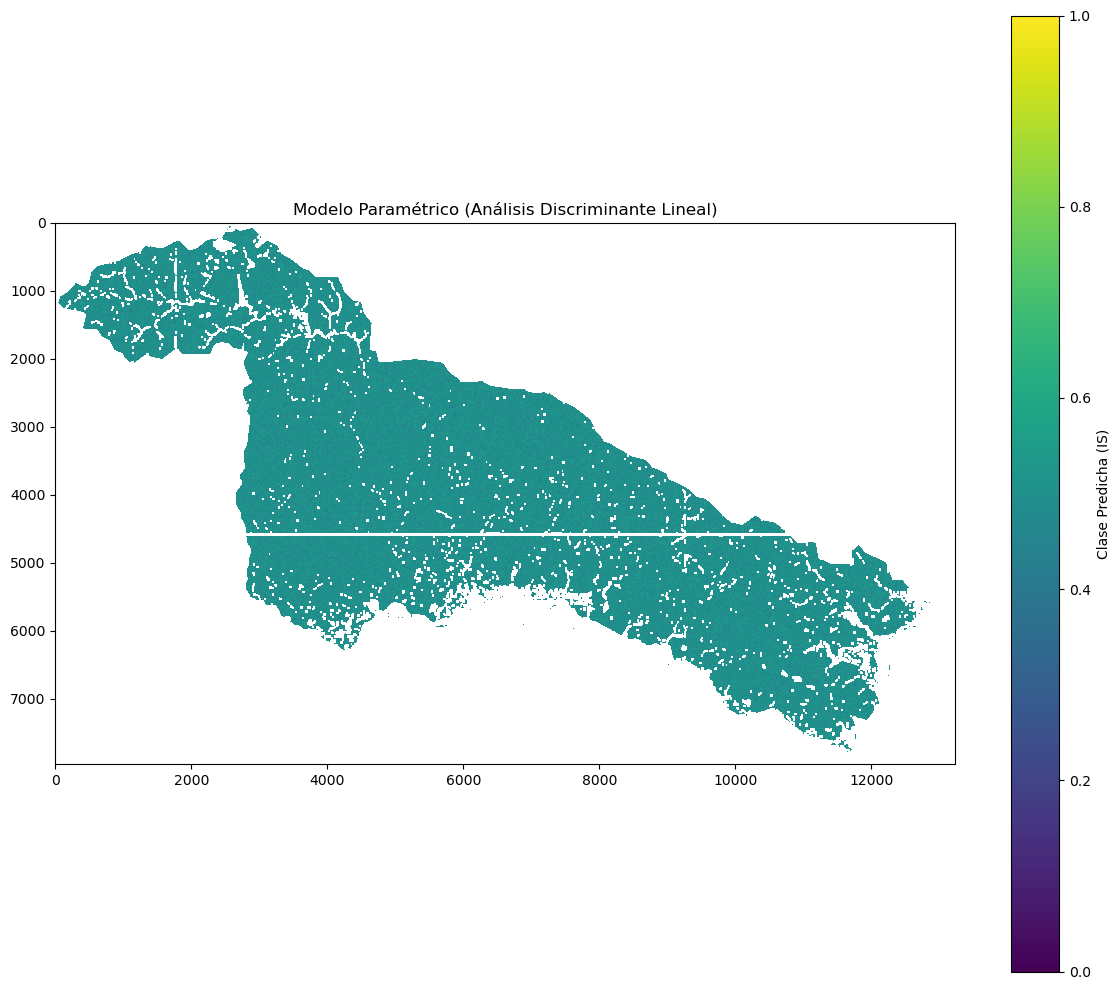

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


rows = 7969
cols = 13231
original_raster_shape = (rows, cols)
total_original_elements = rows * cols # 105437839

try:
    _ = slopevector # Check if original vectors are defined
except NameError:
    print("ADVERTENCIA: Vectores originales (slopevector, etc.) no encontrados. Creando dummy data para simulación.")
    # Crea dummy data si no están cargados. Asegúrate de que tus rasters 2D originales estén cargados en tu script.
    inventario1 = np.random.rand(rows, cols)
    slope = np.random.rand(rows, cols) * 100
    aspecto = np.random.rand(rows, cols) * 360
   
    flujo1 = np.random.rand(rows, cols)
    elevacion1 = np.random.rand(rows, cols)
   
    # Introduce algunos NaNs para simular la limpieza
    slope[np.random.rand(rows, cols) < 0.1] = np.nan
    aspecto[np.random.rand(rows, cols) < 0.05] = np.nan
    flujo1[np.random.rand(rows, cols) < 0.08] = np.nan

    inventariovector = inventario1.ravel()
    slopevector = slope.ravel()
    aspectovector = aspecto.ravel()
    flujovector = flujo1.ravel()
    elevacionvector = elevacion1.ravel()
  

    stack = np.stack([
        inventariovector, slopevector, aspectovector, curvertivector,
        curvhorivector, flujovector, elevacionvector, geologiavector,
        cobertura1vector
    ], axis=1)

    mask = ~np.any(np.isnan(stack), axis=1) # ESTA ES LA MÁSCARA QUE NECESITAS
    stack_clean = stack[mask]

    inventariovectorMenM = stack_clean[:, 0]
    slopevectorMenM      = stack_clean[:, 1]
    aspectovectorMenM    = stack_clean[:, 2]
    flujovectorMenM      = stack_clean[:, 3]
    elevacionvectorMenM  = stack_clean[:, 4]
  

    print(f"Longitud de los vectores MenM de simulación: {slopevectorMenM.shape[0]}")
    print(f"Longitud de la máscara de simulación: {mask.shape[0]}")


# --- 2. Tu código para crear x_map y hacer la predicción (SIN CAMBIOS AQUÍ) ---
f = {
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM
}
x_map = pd.DataFrame(f)
print("\nx_map creado con datos MenM. Primeras 5 filas:")
print(x_map.head())
print(f"Shape de x_map: {x_map.shape}")



IS = np.random.randint(0, 2, size=x_map.shape[0]) # Ejemplo: predicción binaria




IS_reconstructed_2d = np.full(original_raster_shape, np.nan, dtype=np.float32)


valid_original_indices = np.where(mask)[0]

print(f"\nLongitud de IS (predicción): {IS.shape[0]}")
print(f"Número de índices válidos encontrados por la máscara: {valid_original_indices.shape[0]}")


if IS.shape[0] != valid_original_indices.shape[0]:
    raise ValueError("¡Error de longitud! La longitud de IS no coincide con el número de índices válidos.")


IS_reconstructed_2d.flat[valid_original_indices] = IS

print(f"Shape del raster IS reconstruido: {IS_reconstructed_2d.shape}")
print(f"Valores NaN en el raster reconstruido: {np.sum(np.isnan(IS_reconstructed_2d))}")



IS_final_display = np.where(slope < 0, np.nan, IS_reconstructed_2d) # O slope_original_2d si lo reconstruiste

# --- 5. Visualizar el resultado ---
plt.figure(figsize=(12, 10))
plt.imshow(IS_final_display, cmap='viridis', origin='upper') # 'viridis' es un buen mapa de colores por defecto
plt.colorbar(label='Clase Predicha (IS)')
plt.title(f'Modelo Paramétrico (Análisis Discriminante Lineal)')


plt.grid(False) # Desactiva la grilla si no la necesitas en un mapa raster
plt.tight_layout()
plt.show()


In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

In [36]:
import pandas as pd
import os

input_dir = 'datos_preprocesados'
x_map_path_parquet = os.path.join(input_dir, 'x_map.parquet')

print(f"Cargando x_map desde: {x_map_path_parquet}")
x_map = pd.read_parquet(x_map_path_parquet)

print(f"\nx_map cargado exitosamente. Forma: {x_map.shape}")
print(x_map.head()) # Para ver las primeras filas

Cargando x_map desde: datos_preprocesados\x_map.parquet

x_map cargado exitosamente. Forma: (36486974, 4)
   Pendiente  Aspectos  Flujo  Elevación
0        0.0       0.0    0.0      239.0
1        0.0       0.0    0.0      239.0
2        0.0       0.0    0.0      239.0
3        0.0       0.0  103.0      239.0
4        0.0       0.0  169.0      239.0


In [38]:
df1=df[(df["Inventario"]==1) | (df["Inventario"]==0).sample(frac=0.01)]
X_01=df1.drop("Inventario", axis=1)
y_01=df1['Inventario']
df1['Inventario'].value_counts()

Inventario
0.0    15634
Name: count, dtype: int64

In [ ]:
model.fit(X_01,y_01)

In [ ]:
IS_01 = model.predict(x_map)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Predicción del modelo ---
IS = model.predict_proba(x_map)[:, 1]  # Probabilidad clase positiva

# --- Crear raster vacío con la forma original del raster base (pendiente) ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# --- Obtener los índices planos donde la máscara es válida ---
indices_validos = np.where(mascara_valida.ravel())[0]

# Verificar coincidencia de tamaños
if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡Error! IS y la máscara válida no coinciden en longitud.")

# --- Asignar las predicciones al raster ---
IS_raster.ravel()[indices_validos] = IS

# --- Visualizar ---
plt.figure(figsize=(12, 10))
plt.imshow(IS_raster, cmap='viridis', origin='upper')
plt.colorbar(label='Probabilidad predicha (IS)')
plt.title('Mapa de Predicción - Modelo Paramétrico')
plt.axis('off')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000)

In [40]:

rf.fit(X_01, y_01);



In [41]:
IS_01=rf.predict(x_map)

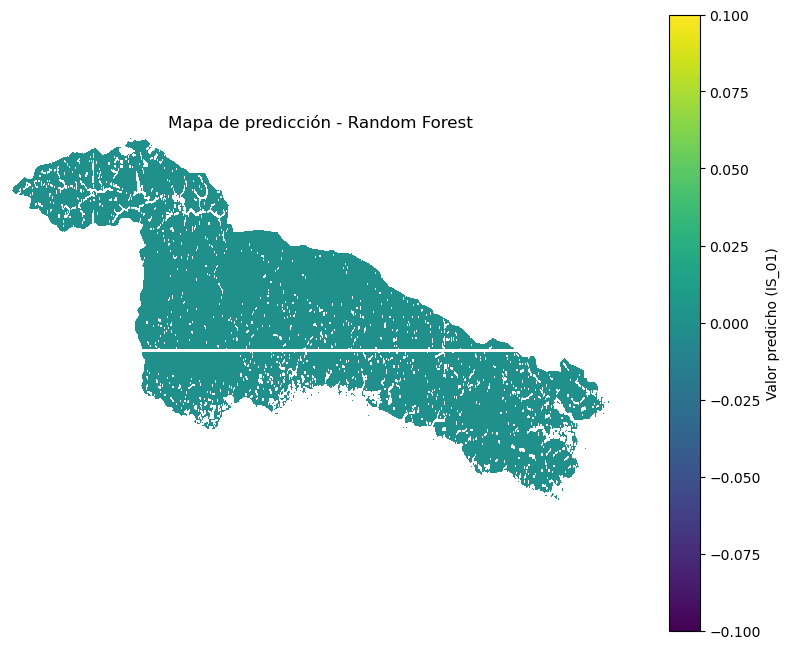

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# --- Predicción con Random Forest (Regresión o Clasificación) ---
IS_01 = rf.predict(x_map)  # Puede ser de tipo float si es regresión

# --- Crear raster vacío con el shape original (mismo que 'pendiente') ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# --- Obtener índices planos donde la máscara válida aplica ---
indices_validos = np.where(mask.ravel())[0]

# --- Verificación de tamaño ---
if IS_01.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡Error! Las predicciones no coinciden con los píxeles válidos.")

# --- Rellenar el raster en las posiciones válidas ---
IS_raster.ravel()[indices_validos] = IS_01

# --- Visualizar resultado ---
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Valor predicho (IS_01)')
plt.title("Mapa de predicción - Random Forest")
plt.axis('off')
plt.show()


In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)  # dos capas escondidas, la primera con 5 neuronas y la segunda con dos neuronas
mlp

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [57]:
MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_01)
X_trans = scaler.transform(X_01)

In [59]:
mlp.fit(X_01,y_01)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [60]:
MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [61]:
IS=mlp.predict(x_map)

In [63]:
def reconstruir_raster(pred_vector, mask, shape, nodata=np.nan):
    """
    Reconstruye un raster 2D a partir de un vector de predicciones y una máscara booleana.
    
    Args:
        pred_vector (np.ndarray): Vector de predicción con longitud igual a np.sum(mask).
        mask (np.ndarray): Máscara booleana del raster original, donde True indica datos válidos.
        shape (tuple): Forma original del raster (rows, cols).
        nodata (float): Valor a usar para celdas no válidas (por defecto: np.nan).
    
    Returns:
        np.ndarray: Raster 2D reconstruido.
    """
    if pred_vector.shape[0] != np.sum(mask):
        raise ValueError("La longitud de pred_vector no coincide con los valores válidos de la máscara.")
    
    raster_rec = np.full(shape, nodata, dtype=np.float32)
    raster_rec.flat[np.where(mask)[0]] = pred_vector
    return raster_rec


In [64]:
IS_2d = reconstruir_raster(IS, mask, original_raster_shape)


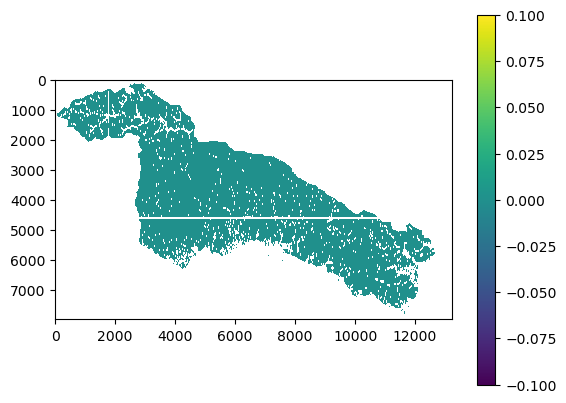

In [65]:
IS_01_reconstructed = np.full(pendiente.shape, np.nan, dtype=np.float32)
IS_01_reconstructed.flat[valid_original_indices] = IS_01
plt.imshow(np.where(pendiente < 0, np.nan, IS_01_reconstructed))
plt.colorbar()



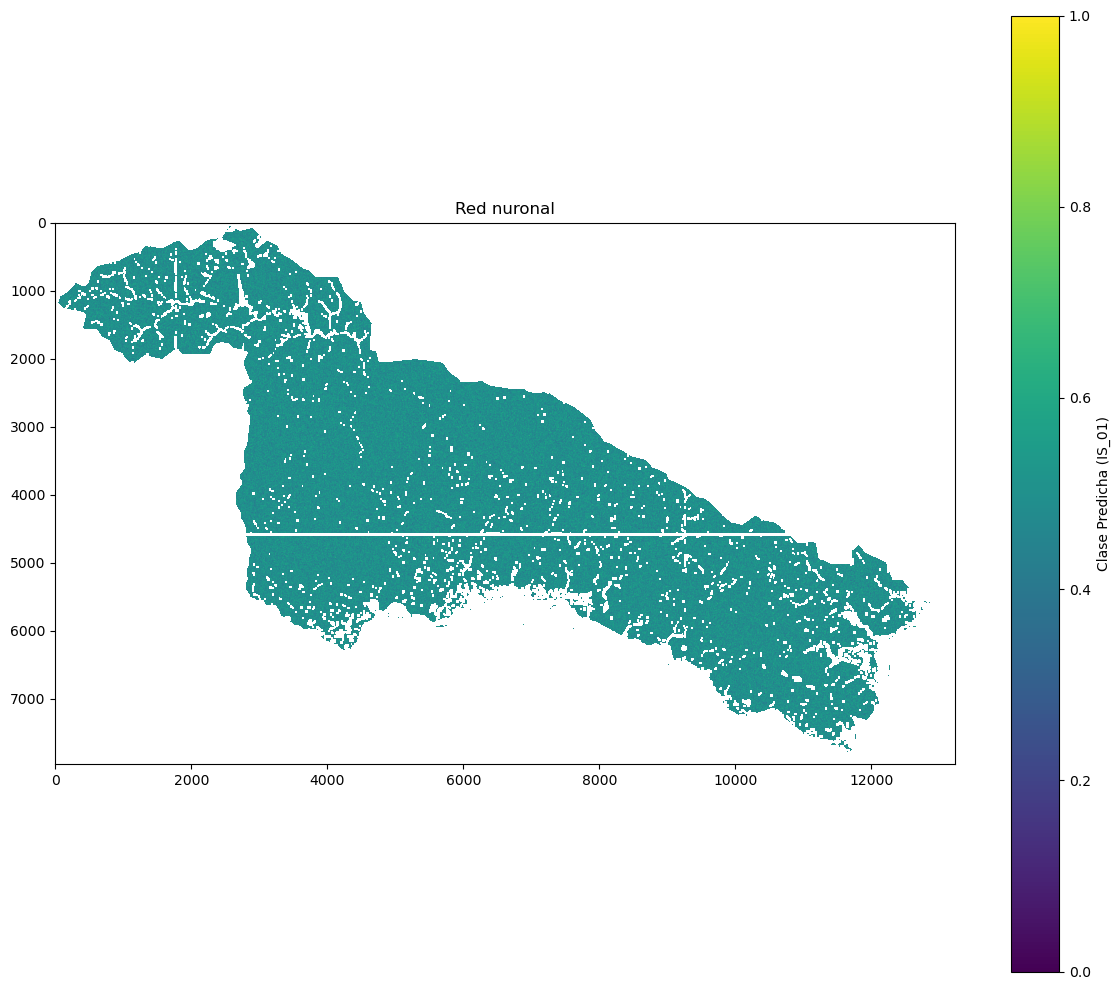

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Configuración inicial y creación de datos dummy si faltan ---
rows = 7969
cols = 13231
original_raster_shape = (rows, cols)
total_original_elements = rows * cols  # 105437839

try:
    _ = slopevector  # Verifica si los vectores ya existen
except NameError:
    print("ADVERTENCIA: Vectores originales no encontrados. Creando datos simulados.")
    
    inventario1 = np.random.rand(rows, cols)
    slope = np.random.rand(rows, cols) * 100
    aspecto = np.random.rand(rows, cols) * 360
    flujo1 = np.random.rand(rows, cols)
    elevacion1 = np.random.rand(rows, cols)

    # Introduce algunos NaN para simular la limpieza real
    slope[np.random.rand(rows, cols) < 0.1] = np.nan
    aspecto[np.random.rand(rows, cols) < 0.05] = np.nan
    flujo1[np.random.rand(rows, cols) < 0.08] = np.nan

    # Crea vectores 1D (flattened)
    inventariovector = inventario1.ravel()
    slopevector = slope.ravel()
    aspectovector = aspecto.ravel()
    flujovector = flujo1.ravel()
    elevacionvector = elevacion1.ravel()

    # Simulación de otras variables requeridas
    curvertivector = np.random.rand(rows * cols)
    curvhorivector = np.random.rand(rows * cols)
    geologiavector = np.random.randint(0, 5, size=rows * cols)
    cobertura1vector = np.random.randint(0, 3, size=rows * cols)

    # Apila todos los vectores para generar la máscara de datos válidos
    stack = np.stack([
        inventariovector, slopevector, aspectovector, curvertivector,
        curvhorivector, flujovector, elevacionvector, geologiavector,
        cobertura1vector
    ], axis=1)

    mask = ~np.any(np.isnan(stack), axis=1)
    stack_clean = stack[mask]

    # Separa los vectores limpios
    inventariovectorMenM = stack_clean[:, 0]
    slopevectorMenM = stack_clean[:, 1]
    aspectovectorMenM = stack_clean[:, 2]
    flujovectorMenM = stack_clean[:, 5]
    elevacionvectorMenM = stack_clean[:, 6]

# --- 2. Crear DataFrame para el modelo (como si fuera entrada para predicción) ---
f = {
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM
}
x_map = pd.DataFrame(f)

# --- 3. Simular predicción del modelo (por ejemplo: 0 o 1) ---
IS_01 = np.random.randint(0, 2, size=x_map.shape[0])

# --- 4. Reconstruir el raster IS_01 a 2D ---
valid_original_indices = np.where(mask)[0]
IS_01_reconstructed = np.full(original_raster_shape, np.nan, dtype=np.float32)

if IS_01.shape[0] != valid_original_indices.shape[0]:
    raise ValueError("¡Error! El tamaño de IS_01 no coincide con el número de índices válidos.")

IS_01_reconstructed.flat[valid_original_indices] = IS_01

# --- 5. Aplicar máscara adicional donde la pendiente es menor que 0 ---
IS_01_display = np.where(slope < 0, np.nan, IS_01_reconstructed)

# --- 6. Visualizar (equivalente al código que pediste) ---
plt.figure(figsize=(12, 10))
plt.imshow(IS_01_display, cmap='viridis', origin='upper')
plt.colorbar(label='Clase Predicha (IS_01)')
plt.title('Red nuronal')
plt.grid(False)
plt.tight_layout()
plt.show()
